In [96]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import os
import time

from tensorflow import keras
import tensorflow as tf

# importing the sequential model
from keras.models import Sequential

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# importing different layers from keras
from keras.layers import InputLayer, Dense, Dropout
from keras.optimizers import Adam

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [145]:
# Reading the dataset
df = pd.read_csv('../data/deep_learning_task_dataset.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [146]:
# fill the missing values with the mean of the column
df.fillna(df.mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_22559/889244835.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [147]:
df['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [148]:
df = df.drop(['Item_Identifier', 'Outlet_Establishment_Year'], axis=1)

df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [149]:
# creating dummy variables for categorical variables
df_encoded = pd.get_dummies(df)

df_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [150]:
df_encoded.shape

(5000, 42)

In [169]:
scaler = MinMaxScaler()
df_encoded[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']] = scaler.fit_transform(df_encoded[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']])
df_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,0.324387,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.058705,0.072068,0.035939,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.051037,0.468288,0.180863,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.000000,0.640093,0.061260,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0.260494,0.000000,0.095805,0.084247,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [173]:
X = df_encoded.drop(['Item_Outlet_Sales'], axis=1)
y = df_encoded[['Item_Outlet_Sales']]

X.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.058705,0.072068,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.051037,0.468288,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.000000,0.640093,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0.260494,0.000000,0.095805,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [171]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

featureScores

ValueError: Unknown label type: (array([[0.3243874 ],
       [0.03593932],
       [0.18086348],
       ...,
       [0.10571762],
       [0.15577596],
       [0.2008168 ]]),)

In [176]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lasso = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso.fit(X, y)

# Use SelectFromModel to get selected features
model = SelectFromModel(lasso, prefit=True)
X_selected = model.transform(X)

/Users/jesselang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


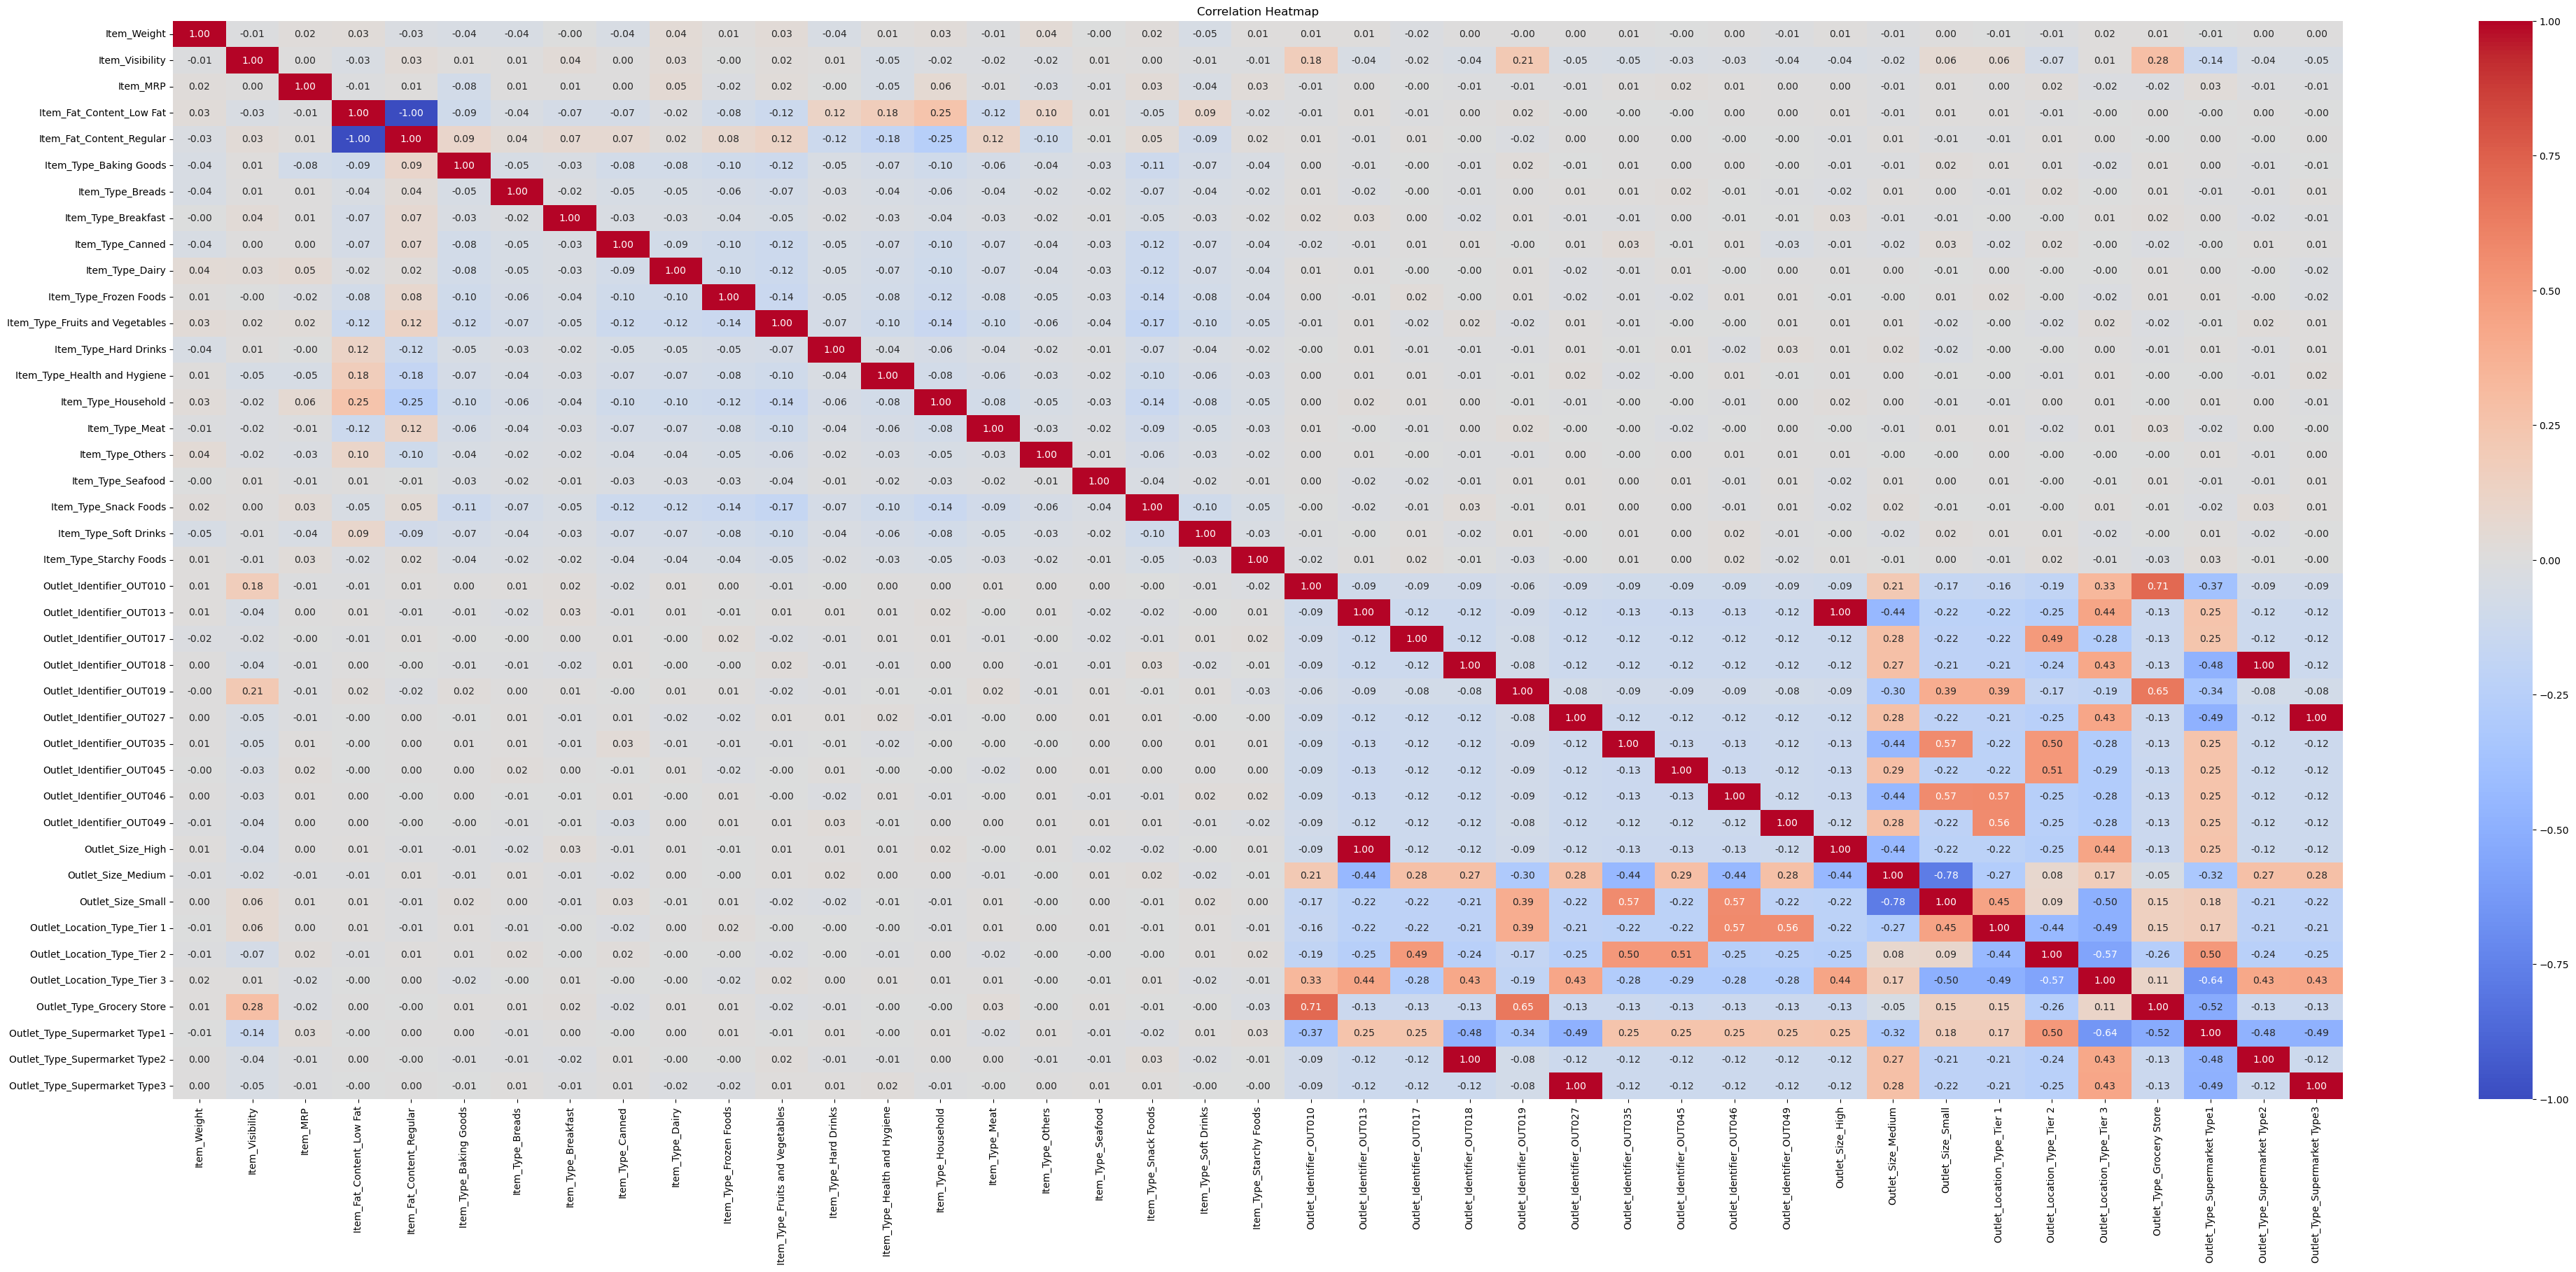

In [177]:
# # Create a heatmap
plt.figure(figsize=(50, 20))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [84]:
scaler = MinMaxScaler()
df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']] = scaler.fit_transform(
    df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.858489,Low Fat,-0.969193,Dairy,1.738348,OUT049,Medium,Tier 1,Supermarket Type1,0.908275
1,-1.651386,Regular,-0.906091,Soft Drinks,-1.491705,OUT018,Medium,Tier 3,Supermarket Type2,-1.024662
2,1.065108,Low Fat,-0.955272,Meat,0.004383,OUT049,Medium,Tier 1,Supermarket Type1,-0.053502
3,1.463903,Regular,-1.282610,Fruits and Vegetables,0.653102,OUT010,Medium,Tier 3,Grocery Store,-0.854982
4,-0.945285,Low Fat,-1.282610,Household,-1.402079,OUT013,High,Tier 3,Supermarket Type1,-0.700942


In [178]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_22559/1187722798.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_new = X_encoded[features]


(((4000, 3), (4000, 1)), ((1000, 3), (1000, 1)))

In [67]:
import os
import time

def createModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate):
    model = Sequential()
    model.add(InputLayer(input_shape=(inputNeurons)))
    for i in range(numHiddLayers):
        model.add(Dense(units=numNeurons, activation='relu'))
    model.add(Dense(units=outputNeurons))
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(learning_rate=learningRate), metrics=['mse'])
    return model

def createLogEntry(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, runTime):
    logEntry = pd.DataFrame([[inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, runTime]],
                            columns=['inputNeurons', 'outputNeurons', 'numHiddLayers', 'numNeurons', 'learningRate', 'epochs', 'r2Score', 'mse', 'loss', 'batchSize', 'runTime'])

    # save the log entry to CSV with header, and append new entries without rewriting the file, with only one header
    if not os.path.isfile('prob4_new_log.csv'):
        logEntry.to_csv('prob4_new_log.csv', index=False, header=True, mode='a')
    else:
        # Append without writing the header
        logEntry.to_csv('prob4_new_log.csv', index=False, header=False, mode='a')

    return logEntry

def fitModel(model, X_train, y_train, X_test, y_test, epochs, batchSize):
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batchSize)
    return model_history

def evaluateModel(model, X_test, y_test):
    loss, mse = model.evaluate(X_test, y_test)
    return loss, mse

def predictModel(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

def calculateR2Score(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    return r2

def plotModelHistory(model_history):
    # summarize history for loss
    plt.plot(model_history.history['mse'])
    plt.plot(model_history.history['val_mse'])
    plt.title('model accuracy')
    plt.ylabel('mse')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

def runModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, batchSize):
    start_time = time.time()
    
    model = createModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate)
    model_history = fitModel(model, X_train, y_train, X_test, y_test, epochs, batchSize)
    loss, mse = evaluateModel(model, X_test, y_test)
    y_pred = predictModel(model, X_test)
    r2Score = calculateR2Score(y_test, y_pred)
    plotModelHistory(model_history)
    
    end_time = time.time()
    run_time = end_time - start_time
    
    return createLogEntry(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, run_time)



Epoch 1/1000
125/125 [==============================] - 1s 3ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 2/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 3/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 4/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 5/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 6/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 7/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 8/1000
125/125 [==============================] - 0s 1ms

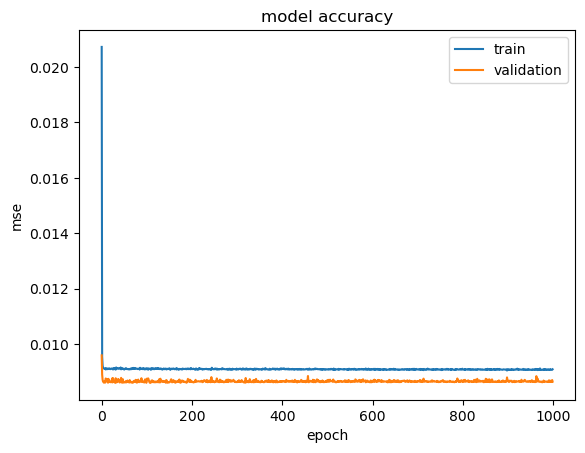

,inputNeurons,outputNeurons,numHiddLayers,numNeurons,learningRate,epochs,r2Score,mse,loss,batchSize,runTime
0,3,1,2,100,0.0001,1000,0.609654,0.008653,0.008653,32,164.209999


In [182]:
runModel(inputNeurons=X_train.shape[1], outputNeurons=1, numHiddLayers=2, numNeurons=100, learningRate=0.0001, epochs=1000, batchSize=32)